In [1]:
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

from keras.layers import LeakyReLU

from statistics import mean
from datetime import date
import datetime
import os
from sklearn.utils import check_array as check_arrays
from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In [2]:
# Create folder to save results in
identify = '1100songsTimeSeriesClusterTrain1ConvLSTMNorm56'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify
#os.mkdir(folder_name)

# Load Dataset
df = pd.read_csv('datasets/Dataset_DailyPlays_DomainFeatures.csv', sep=';', index_col=0, decimal=',')
df = df.drop(columns=['Slope28', 'ArtistPopularity', 'Slope56','FirstWeek','Label 2'])

# Set dataset range
df_range = '160'
df = df.loc[:, :df_range]
df

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,33,35,34,45,29,40,47,21,30,33
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,892,807,834,762,830,828,833,841,848,817
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,608,601,636,612,608,594,599,634,567,621
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,31,33,32,29,35,33,28,29,33,30
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,180,168,173,158,162,173,154,156,146,159
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,705,756,705,667,734,687,713,757,706,774
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,864,869,919,930,876,896,837,830,844,901
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,360,306,287,319,329,343,303,313,313,315
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,1,3,1,0,1,1,1,3,1
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,650,718,679,665,702,655,729,741,688,663


In [3]:
# Define dataset with songs to test on
list_of_test_songs = ['Katy Perry - Never Really Over' , 
              'Taylor Swift - You Need To Calm Down', 
              'Shawn Mendes & Camila Cabello - SeÃ±orita', 
              'Ava Max - So Am I', 
              'Andreas Bourani - Auf uns', 
              'Meduza feat. Goodboys - Piece Of Your Heart', 
              'Pietro Lombardi - Nur Ein Tanz', 
              'Loud Luxury feat. brando - Body', 
              'Mark Forster - Sowieso', 
              'Camila Cabello feat. Young Thug - Havana',  
        ] 
song_index = 1
df_test = df.loc[list_of_test_songs]
df_test = df_test[song_index:song_index+1]

df_test

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Taylor Swift - You Need To Calm Down,70,109,202,210,222,199,205,226,297,362,...,155,147,148,172,160,134,147,197,123,146


In [4]:
# Define dataset with songs to train on
df_train = df[~df.index.isin(list_of_test_songs)]
df_train

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,33,35,34,45,29,40,47,21,30,33
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,892,807,834,762,830,828,833,841,848,817
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,31,33,32,29,35,33,28,29,33,30
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,180,168,173,158,162,173,154,156,146,159
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,864,869,919,930,876,896,837,830,844,901
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,360,306,287,319,329,343,303,313,313,315
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,1,3,1,0,1,1,1,3,1
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,650,718,679,665,702,655,729,741,688,663
Childish Gambino - This Is America,25,51,46,48,37,49,82,78,80,83,...,34,36,32,37,45,46,47,49,47,47
Chris Brown - Undecided,41,68,75,108,111,103,98,111,120,136,...,24,21,40,35,41,35,40,40,31,28


In [5]:
# Split train dataset into input and output days. Change value of input_days
n_steps_in = 56
number_of_total_days = 140
n_steps_out = number_of_total_days - n_steps_in


# define the train data input and output
train_input_data = df_train.iloc[:, 0:n_steps_in]
train_output_data = df_train.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
train_input = array(train_input_data)
train_output = array(train_output_data)

# create scaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
#x_scaler = StandardScaler()
#y_scaler = StandardScaler()

# fit scaler on data
train_input = x_scaler.fit_transform(train_input)
train_output = y_scaler.fit_transform(train_output)

print("Input days: ", len(train_input[0])) 
print("Output days: ", len(train_output[0]))
print("Example of first song input data: ", train_input[0])
print("Example of first song output data: ", train_output[0])


Input days:  56
Output days:  84
Example of first song input data:  [0.06415094 0.04551724 0.08047493 0.06569343 0.16609784 0.16802444
 0.20682068 0.24659232 0.22529224 0.12899897 0.21546392 0.15384615
 0.20223577 0.28       0.22105263 0.28286015 0.27953586 0.32606325
 0.3012884  0.22156863 0.25652174 0.23733863 0.26130199 0.23396567
 0.1776824  0.18648208 0.24599832 0.1875     0.23318777 0.23032787
 0.22742475 0.19167389 0.2393968  0.14117647 0.14876033 0.17612688
 0.22922135 0.23240589 0.17166667 0.16450567 0.15553677 0.12048193
 0.10428016 0.12999217 0.13371151 0.13974895 0.13349321 0.1123506
 0.15303644 0.17455392 0.10380349 0.1541411  0.14463453 0.12555721
 0.12441315 0.20654716]
Example of first song output data:  [0.14834337 0.14383043 0.15789474 0.16271722 0.16958599 0.16905901
 0.21131186 0.18368963 0.25161812 0.18892508 0.1674277  0.23014587
 0.18779715 0.11195735 0.06338553 0.06571655 0.05942948 0.08715596
 0.08273667 0.08034321 0.19014627 0.1983346  0.23909657 0.19450801
 0

In [6]:
# Split test dataset into input and output days.

# define the test data input and output
test_input_data = df_test.iloc[:, 0:n_steps_in]
test_output_data = df_test.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
test_input = array(test_input_data)
test_output = array(test_output_data)

# transform data
test_input = x_scaler.transform(test_input)

print("Input days: ", len(test_input[0])) 
print("Output days: ", len(test_output[0]))
print("Example of first song input data: ", test_input[0])
print("Example of first song output data: ", test_output[0])

Input days:  56
Output days:  84
Example of first song input data:  [0.13018868 0.15034483 0.26649077 0.25547445 0.25255973 0.20264766
 0.22552255 0.28004957 0.31562168 0.37358101 0.34329897 0.40252898
 0.27845528 0.41111111 0.34947368 0.35436383 0.45042194 0.36423119
 0.29236868 0.3754902  0.37065217 0.39126117 0.32730561 0.37850045
 0.3776824  0.34690554 0.40101095 0.39529221 0.40524017 0.4
 0.33779264 0.40936687 0.41847314 0.41344538 0.4107438  0.43906511
 0.4671916  0.47135843 0.415      0.39951378 0.43195266 0.36144578
 0.37898833 0.34925607 0.37763371 0.42259414 0.38848921 0.4374502
 0.4048583  0.41039566 0.45721078 0.40644172 0.44090202 0.44279346
 0.38967136 0.44738893]
Example of first song output data:  [568 587 563 585 611 566 598 623 597 655 674 601 558 638 630 611 650 577
 575 596 552 603 635 646 615 532 573 545 555 657 643 562 607 575 611 520
 580 555 492 554 552 565 509 541 503 495 565 550 504 532 533 510 427 473
 477 431 442 489 445 364 398 337 325 396 403 388 444 368 3

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1

# define model
# ConvLSTM Model

# Lenght of sub-sequence
n_seq = 7

# Number of sub-sequences
n_steps = 8

# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
train_input = train_input.reshape((train_input.shape[0], n_seq, 1, n_steps, n_features))
test_input = test_input.reshape((1, n_seq, 1, n_steps, n_features))


# ConvLSTM Model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), input_shape=(n_seq, 1, n_steps, n_features)))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(50))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')


history = model.fit(train_input, train_output, epochs=10000, batch_size=8, validation_data=(test_input, test_output), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

yhat = history

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 86 samples, validate on 1 samples
Epoch 1/10000
86/86 [==============================] - 1s 9ms/step - loss: 0.1548 - val_loss: 260601.4062
Epoch 2/10000
86/86 [==============================] - 0s 1ms/step - loss: 0.1106 - val_loss: 260298.4688
Epoch 3/10000
86/86 [==============================] - 0s 1ms/step - loss: 0.0683 - val_loss: 260256.3281
Epoch 4/10000
86/86 [==============================] - 0s 1ms/step - loss: 0.0528 - val_loss: 260171.5312
Epoch 5/10000
86/86 [==============================] - 0s 1ms/step - loss: 0.0442 - val_loss: 260182.3750
Epoch 6/10000
86/86 [==============================] - 0s 1ms/step - loss: 0.0414 - val_loss: 260149.5781
Epoch 7/10000
86/86 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 260162.4531
Epoch 8/10000
86/86 [==============================] - 0s 1ms/step - loss: 0.0370 - val_loss: 2

In [8]:
# demonstrate prediction
yhat = model.predict(test_input, verbose=0)
print("predicticted time series output: ", yhat)

# transform data back to original scale
yhat = y_scaler.inverse_transform(yhat)

# Define the first expected and predicted
expected = test_output[0]
predictions = yhat[0]
print("Expected time series output: ", expected)
print("Predicted time series output: ", predictions)

predicticted time series output:  [[0.3983239  0.40301344 0.41222337 0.37390864 0.3905421  0.39503857
  0.3865473  0.42525795 0.42795226 0.4071457  0.35741103 0.42698818
  0.39065203 0.38739762 0.4003719  0.45111266 0.40445954 0.38937095
  0.43355128 0.4446279  0.41101083 0.38050097 0.412737   0.4454991
  0.42143676 0.40216503 0.3886484  0.42767978 0.4094267  0.43988803
  0.45845675 0.42894322 0.430374   0.40925974 0.47736937 0.38805738
  0.405095   0.40980965 0.46985546 0.41792497 0.43663555 0.44256365
  0.43383974 0.43268216 0.42356664 0.45125663 0.38259897 0.39934507
  0.4697554  0.43715465 0.39275682 0.44817463 0.42723837 0.4650883
  0.4276105  0.40605214 0.41492513 0.4123937  0.43108687 0.4264582
  0.40815642 0.40635473 0.37444693 0.41285554 0.40195158 0.4188165
  0.39478117 0.46345687 0.42304444 0.38899186 0.40921614 0.3687553
  0.395491   0.38107616 0.37357873 0.37070662 0.38840565 0.39969015
  0.36966783 0.3902573  0.41112575 0.3872226  0.3314338  0.37277803]]
Expected time ser

In [9]:
# Create variable for each song, used to compare predicted and true value
lst1 = [test_output[0], yhat[0]]

# Set value for labelling
daysOrWeeks = 'Days'

# Make dataset of test song variables
df1 = pd.DataFrame(lst1).T
df1.columns = ['True', 'Predicted']
df1[daysOrWeeks] = df1.index + n_steps_in
df1.set_index(daysOrWeeks,inplace=True)


In [10]:
# Forecast Error (or Residual Forecast Error)
forecast_errors = [test_output[i]-yhat[i] for i in range(len(test_output))]  

df_result = pd.DataFrame(columns=['Song', 'Date', 'Bias', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSPE', 'Predict_from', 'Predict_to'])

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_square_percentage_error(y_true, y_pred):
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100
    return loss

for i in range(len(test_output)):
    print(list_of_test_songs[i])

    # Mean Forecast Error (or Forecast Bias), Mean Absolute Error, Mean Squared Error, Root Mean Squared Error  
    bias = mean(forecast_errors[i])
    mae = mean(abs(forecast_errors[i]))
    mape = mean_absolute_percentage_error(test_output[i], yhat[i])
    mse = mean_squared_error(test_output[i], yhat[i]) 
    rmse = sqrt(mse)
    rmspe = root_mean_square_percentage_error(test_output[i], yhat[i])
    df_result = df_result.append({'Date': date.today(),'Song': list_of_test_songs[song_index], 'Bias': bias, 'MAE': mae, 'MAPE': mape, 'MSE': mse, 'RMSE': rmse, 'RMSPE': rmspe, 'Predict_from':n_steps_in, 'Predict_to': number_of_total_days}, ignore_index=True)
    
    print('Bias: %f' % bias)
    print('MAE: %f' % mae)
    print('MAPE: %f'% mape)
    print('MSE: %f' % mse)
    print('RMSE: %f' % rmse)
    print('RMSPE %f' % rmspe)
    print('_________________________')

# Create datetime for time of results
now = datetime.datetime.now()
now = str(now.strftime("%Y-%m-%d %H:%M:%S"))

# Save Results to csv file in folder
#df_result.to_csv(folder_name+'/'+identify+'_'+now+'.csv', sep=';', decimal=',' )

df_result

Katy Perry - Never Really Over
Bias: -16.720679
MAE: 82.358125
MAPE: 19.801619
MSE: 9549.454329
RMSE: 97.721309
RMSPE 26.837115
_________________________


,Song,Date,Bias,MAE,MAPE,MSE,RMSE,RMSPE,Predict_from,Predict_to
0,Taylor Swift - You Need To Calm Down,2020-06-06,-16.7207,82.3581,19.8016,9549.4543,97.7213,26.8371,56,140


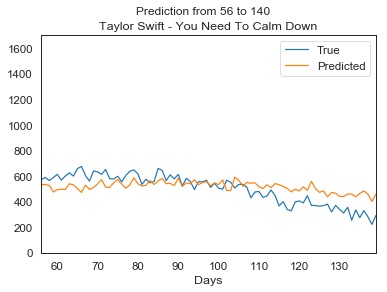

Song:  Taylor Swift - You Need To Calm Down
Prediction from 56 to 140
________________________________________________________________


In [11]:
# Define plotting of graphs and saving them to folder
import matplotlib.pyplot as plt 

pred_title = "Prediction from "+ str(n_steps_in)+" to "+str(number_of_total_days)
fig_size = 1700

df1.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[song_index])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[song_index]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[song_index])
print(pred_title)
print('________________________________________________________________')
